In [2]:
%matplotlib inline

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
# Display the data
life_expectancy = Path("Resources/life_expectancy_kaggle.csv")
life_expectancy_df = pd.read_csv(life_expectancy)
display(life_expectancy_df)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
# Clean the data

# Strip whitespace from column titles
life_expectancy_df.columns = life_expectancy_df.columns.str.strip()

# Drop rows with NaN values in the columns of interest (which will be plotted later)
clean_df = life_expectancy_df.dropna(subset=["Alcohol",
                                             "percentage expenditure",
                                             "Hepatitis B",
                                             "Measles",
                                             "Polio",
                                             "Total expenditure",
                                             "Diphtheria",
                                             "thinness 5-9 years",
                                             "Income composition of resources",
                                             "Schooling"])

In [5]:
# Display columns with indices to assist in next step of choosing variables of interest
columns_df = pd.DataFrame(clean_df.columns)
display(columns_df)

,0
0,Country
1,Year
2,Status
3,Life expectancy
4,Adult Mortality
5,infant deaths
6,Alcohol
7,percentage expenditure
8,Hepatitis B
9,Measles


In [6]:
# Select variables of interest using above columns DataFrame
variables = [6, 7, 8, 9, 12, 13, 14, 19, 20, 21] # Use this list to select your 10 variables of interest
variable_names = []
for variable in variables:
    variable_name = columns_df.iloc[variable, 0]
    variable_names.append(variable_name)
variable_names

['Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [7]:
# Find countries of interest to plot (in this case, the countries with the most data rows)

# Identify the countries with the most data rows
country_count = clean_df["Country"].value_counts()
n = 10 # Change this variable to select how many countries you want to see
countries_of_interest_df = pd.DataFrame(country_count.head(n)).reset_index()
print(countries_of_interest_df)

                            Country  count
0                       Afghanistan     16
1                           Albania     16
2                            Greece     15
3                             Libya     15
4                       New Zealand     15
5                           Morocco     15
6                          Mongolia     15
7  Micronesia (Federated States of)     15
8                            Mexico     15
9                         Mauritius     15


In [15]:
# Select a country of interest
n = 1 # Change this variable to select a country from the above DataFrame
country_name = countries_of_interest_df.iloc[n, 0]
print(country_name)

Albania


In [16]:
# Prepare data for plotting

# Prepare y-axis data
y_axis_life_expectancy = life_expectancy_df.loc[life_expectancy_df["Country"] == country_name, "Life expectancy"]

y_axis_data = {}
for variable_name in variable_names:
    y_axis_data[variable_name] = life_expectancy_df.loc[life_expectancy_df["Country"] == country_name, variable_name].values
print(y_axis_data)
    
# y_axis_alcohol = life_expectancy_df.loc[life_expectancy_df["Country"] == country_name, variable_names[0]].dropna()
# y_axis_percentage_expenditure = life_expectancy_df.loc[life_expectancy_df["Country"] == country_name, "percentage expenditure"].dropna()
# y_axis_hepatitis_b = life_expectancy_df.loc[life_expectancy_df["Country"] == country_name, "Hepatitis B"].dropna()
# y_axis_measles = life_expectancy_df.loc[life_expectancy_df["Country"] == country_name, "Measles"].dropna()
# y_axis_polio = life_expectancy_df.loc[life_expectancy_df["Country"] == country_name, "Polio"].dropna()
# y_axis_total_expenditure = life_expectancy_df.loc[life_expectancy_df["Country"] == country_name, "Total expenditure"].dropna()
# y_axis_diphtheria = life_expectancy_df.loc[life_expectancy_df["Country"] == country_name, "Diphtheria"].dropna()
# y_axis_thinness = life_expectancy_df.loc[life_expectancy_df["Country"] == country_name, "thinness 5-9 years"].dropna()
# y_axis_human_development_index = life_expectancy_df.loc[life_expectancy_df["Country"] == country_name, "Income composition of resources"].dropna()
# y_axis_schooling = life_expectancy_df.loc[life_expectancy_df["Country"] == country_name, "Schooling"].dropna()

# Prepare x-axis data (year)
x_axis = life_expectancy_df.loc[life_expectancy_df["Country"] == country_name, "Year"]

{'Alcohol': array([4.6 , 4.51, 4.76, 5.14, 5.37, 5.28, 5.79, 5.61, 5.58, 5.31, 5.16,
       4.54, 4.29, 3.73, 4.25, 3.66]), 'percentage expenditure': array([364.9752287 , 428.7490668 , 430.8769785 , 412.4433563 ,
       437.0621    ,  41.82275719, 348.0559517 ,  36.62206845,
        32.24655228,   3.3021542 ,  26.99312143, 221.8428    ,
        14.71928882, 104.5169157 ,  96.20557078,  91.71154052]), 'Hepatitis B': array([99., 98., 99., 99., 99., 99., 98., 99., 98., 98., 98., 99., 97.,
       96., 96., 96.]), 'Measles': array([  0,   0,   0,   9,  28,  10,   0,   0,  22,  68,   6,   7,   8,
        16,  18, 662], dtype=int64), 'Polio': array([99., 98., 99., 99., 99., 99., 98., 99., 99., 97., 97., 98., 97.,
       98., 97., 97.]), 'Total expenditure': array([6.  , 5.88, 5.66, 5.59, 5.71, 5.34, 5.79, 5.87, 6.1 , 5.86, 6.12,
       6.38, 6.27, 6.3 , 6.  , 6.26]), 'Diphtheria': array([99., 98., 99., 99., 99., 99., 98., 99., 98., 97., 98., 97., 97.,
       98., 97., 97.]), 'thinness 5-9 yea

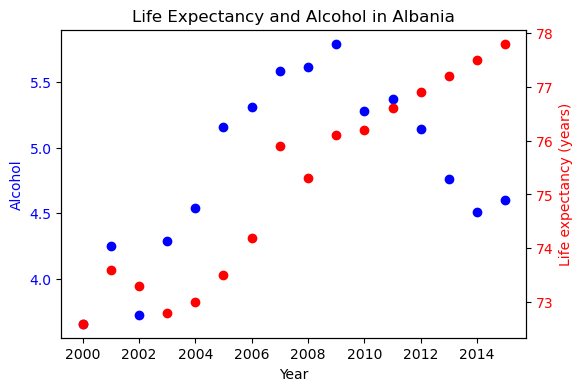

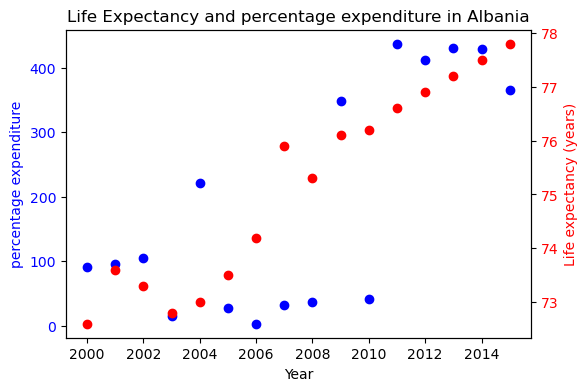

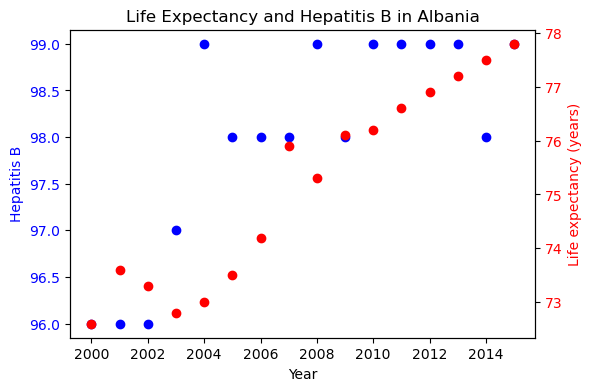

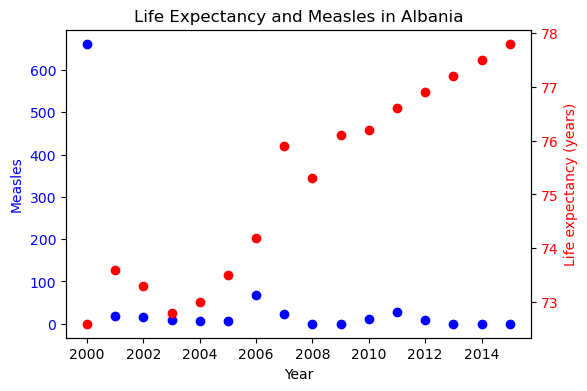

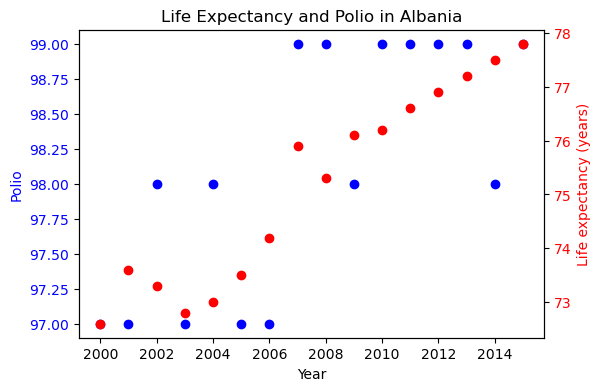

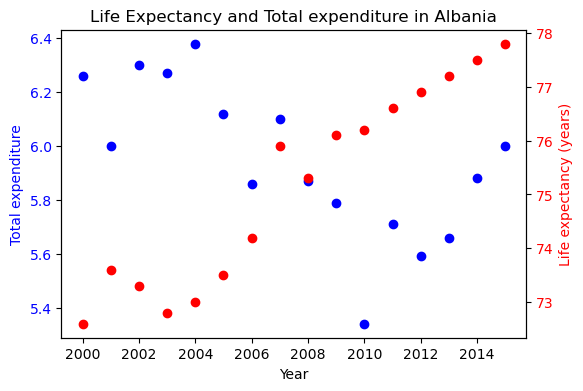

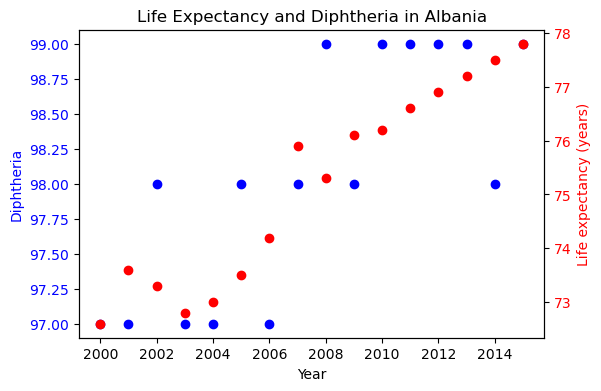

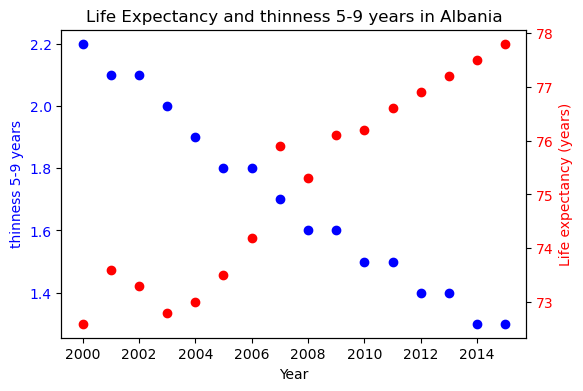

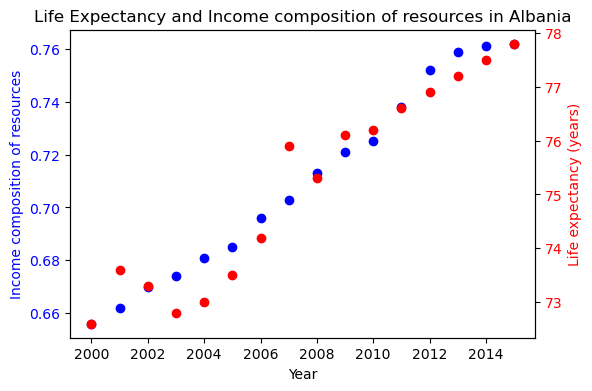

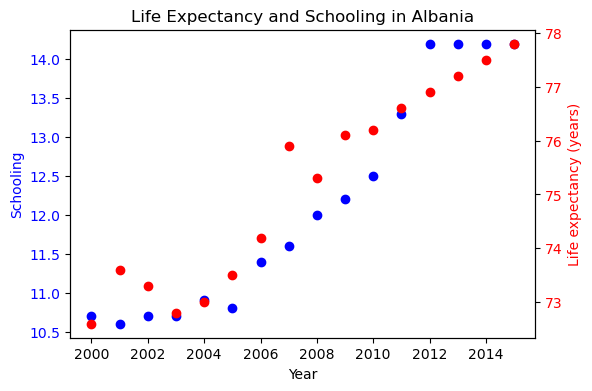

In [17]:
# For the country of interest, plot the life expectancy and each variable of interest over time
for variable_name in variable_names:
    y_axis_variable = y_axis_data[variable_name]
    
    fig, ax1 = plt.subplots(figsize=(6, 4))

    ax1.set_xlabel("Year")
    ax1.set_ylabel(variable_name, color="blue")
    ax1.scatter(x_axis, y_axis_variable, color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    ax2 = ax1.twinx() # Allows plotting of two variables using different y-axis scales
    
    ax2.set_ylabel("Life expectancy (years)", color="red")
    ax2.scatter(x_axis, y_axis_life_expectancy, color="red")
    ax2.tick_params(axis="y", labelcolor="red")

    plt.title(f'Life Expectancy and {variable_name} in {country_name}')
    plt.show()


In [11]:
p

NameError: name 'p' is not defined